<a href="https://colab.research.google.com/github/Shubham5787/EDA-Capstone-Hotel-Booking/blob/main/Hotel_Booking_Analysis_EDA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Type - EDA**
## **Contribution - Individual**
## **Team Member - Shubham Dandnaik**

## **you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
## **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**
## **Explore and analyze the data to discover important factors that govern the bookings.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [ ]:
# Getting an idea of the dataset
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
#Getting all the column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#shape of the dataset
df.shape

(119390, 32)

In [ ]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Describing the numerical column
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# gettting the count of the null values and also who has the top no of null values
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# **Cleaning the Dataset**

# Dropping the columns with most number of null values as well as the column which we dont need for further analysis

In [ ]:
df.drop(['company' , 'agent' , 'previous_bookings_not_canceled' , 'previous_cancellations' , 'reservation_status_date'] , axis = 1 , inplace = True)

In [ ]:
#now after deleting the columns
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
#replacing the null values of children with 0
df['children'].fillna(0 , inplace = True)

In [ ]:
#replacing the null values of categorical colum with the mode of the column
df['country'].value_counts() 

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df['country'].fillna('PRT' , inplace = True)

#  As we know that the Adults , Children cant be 0 at same time so removing the rows where both are 0

In [ ]:
df = df.loc[(df['adults']>0) | (df['children']>0)]

In [ ]:
df.shape

(119210, 27)

# Now we can see that all the data is cleaned now

In [ ]:
df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
dtype: int64

#**Data Analysis & Data Visulization**

# Most prefered Type of hotel and bookings per hotel type

In [ ]:
# getting the diffrent types of hotel prefered
types_of_hotel = df['hotel'].value_counts()
types_of_hotel

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

Text(0.5, 1.0, 'Bookings Per Type of Hotel')

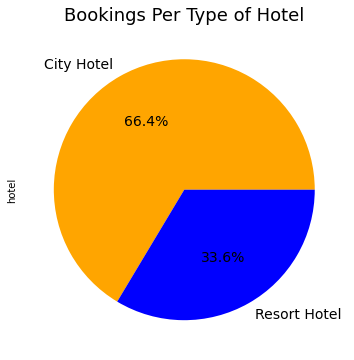

In [ ]:
#plotting the pie chart for the type of booking
types_of_hotel.plot.pie(fontsize = 14 ,figsize = (10,6) , colors = ['orange' , 'blue'] , autopct='%.1f%%')
plt.title('Bookings Per Type of Hotel' , fontsize = 18)

In [ ]:
# To know how many years data we have
bookings_per_year = df['arrival_date_year'].value_counts().reset_index()
bookings_per_year = bookings_per_year.rename(columns = {'index':'Year' , 'arrival_date_year':'bookings per year'})
bookings_per_year

,Year,bookings per year
0,2016,56623
1,2017,40620
2,2015,21967


# Number of Bookings Per Year

Text(0, 0.5, 'Bookings')

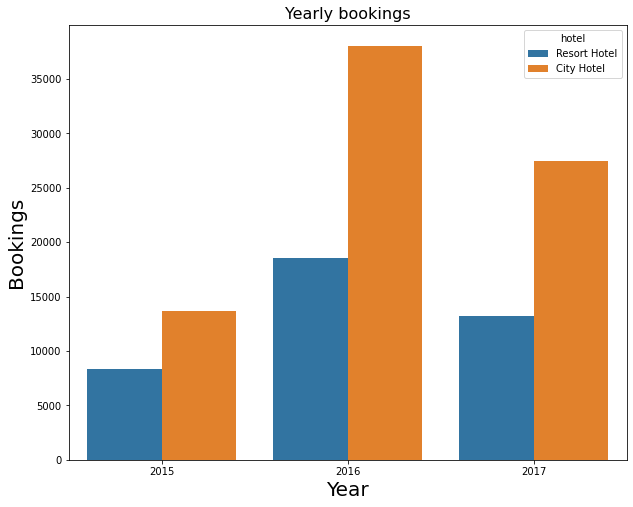

In [ ]:
#plotting the data yearly bookings
plt.figure(figsize=(10, 8))
sns.countplot( data = df ,x = 'arrival_date_year' , hue = 'hotel' ,  )
plt.title('Yearly bookings' , fontsize = 16)
plt.xlabel('Year' , fontsize = 20)
plt.ylabel('Bookings' , fontsize = 20)


# Revenue Generated by each type of hotel

In [ ]:
# revenue generated by the type of hotel
df['revenue'] = df['adr']*(df['stays_in_week_nights'] + df['stays_in_weekend_nights'])
most_revenue = pd.DataFrame(df.groupby('hotel')['revenue'].sum())
most_revenue = most_revenue.reset_index()
x_axis = most_revenue['hotel']
y_axis = most_revenue['revenue']
most_revenue

,hotel,revenue
0,City Hotel,25270401.78
1,Resort Hotel,17443747.57


Text(0, 0.5, 'Revenue in crore')

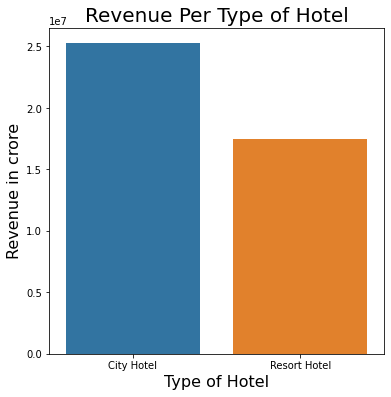

In [ ]:
#plotting the bar graph
plt.figure(figsize=(6,6))
sns.barplot(data = most_revenue , x = 'hotel' , y = 'revenue' )
plt.title('Revenue Per Type of Hotel' , fontsize = 20)
plt.xlabel('Type of Hotel' , fontsize = 16)
plt.ylabel('Revenue in crore' , fontsize = 16)

Text(0, 0.5, 'Bookings Per Type')

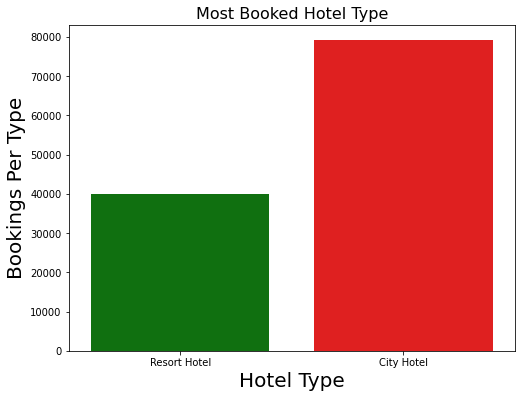

In [ ]:
#plotting the revenue generated by the type of hotel
plt.figure(figsize = (8,6))
sns.countplot(data = df , x = 'hotel' , palette=['green', 'red'])
plt.title('Most Booked Hotel Type' , fontsize = 16)
plt.xlabel('Hotel Type' , fontsize = 20)
plt.ylabel('Bookings Per Type' , fontsize = '20')

# No of Bookings as Per Customer Type

In [ ]:
# bookings per type of customer
bookings_per_type_customer = df['customer_type'].value_counts().reset_index()
bookings_per_type_customer

,index,customer_type
0,Transient,89476
1,Transient-Party,25088
2,Contract,4072
3,Group,574


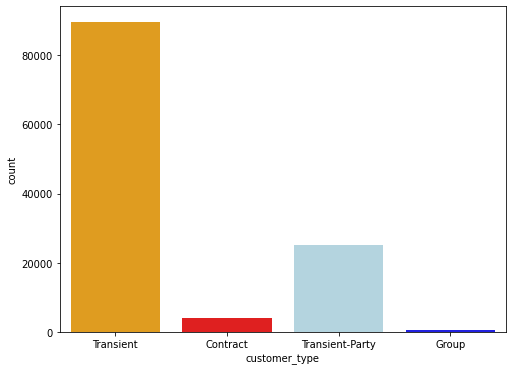

In [ ]:
#plotting bookings per customer type
plt.figure(figsize = (8,6))
sns.countplot(data=df , x = 'customer_type' , palette=['orange', 'red' , 'lightblue' , 'blue'])

# No of Bookings Per Month in Each year finding Out which month has the highest booking per year

In [ ]:
#getting the data of year 2015
data_2015 = df.loc[df['arrival_date_year']==2015].reset_index()


Text(0, 0.5, 'No of Bookings')

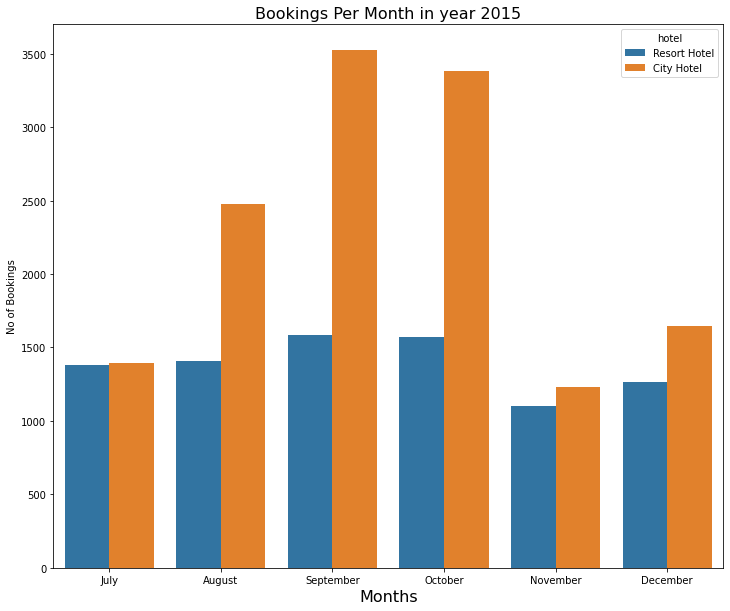

In [ ]:
#plotting the data bookings per month in year 2015
plt.figure(figsize =(12,10))
sns.countplot(data = data_2015 , x = 'arrival_date_month' , hue = 'hotel')
plt.title('Bookings Per Month in year 2015' , fontsize = 16)
plt.xlabel('Months' , fontsize = 16)
plt.ylabel('No of Bookings')

In [ ]:
data_2016 = df.loc[df['arrival_date_year']==2016].reset_index()

Text(0, 0.5, 'No of Bookings')

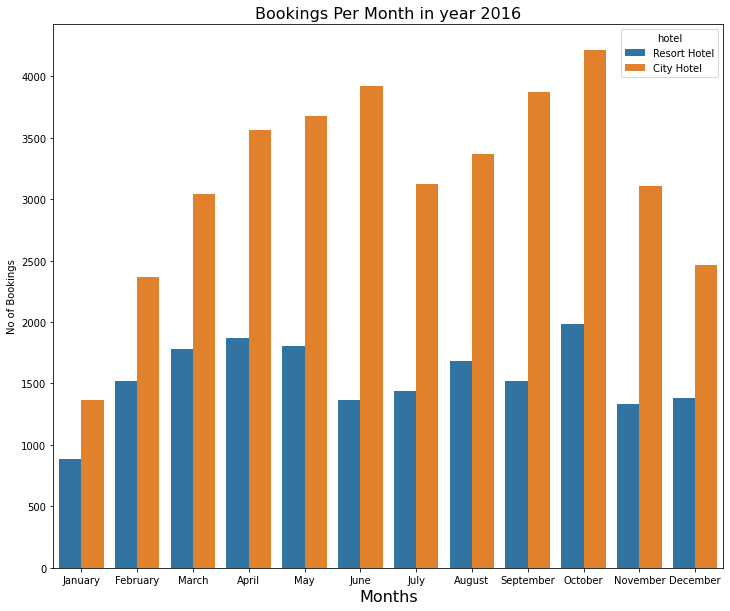

In [ ]:
plt.figure(figsize =(12,10))
sns.countplot(data = data_2016 , x = 'arrival_date_month' , hue = 'hotel')
plt.title('Bookings Per Month in year 2016' , fontsize = 16)
plt.xlabel('Months' , fontsize = 16)
plt.ylabel('No of Bookings')

In [ ]:
#data for 2017
data_2017 = df.loc[df['arrival_date_year']==2017].reset_index()

Text(0, 0.5, 'No of Bookings')

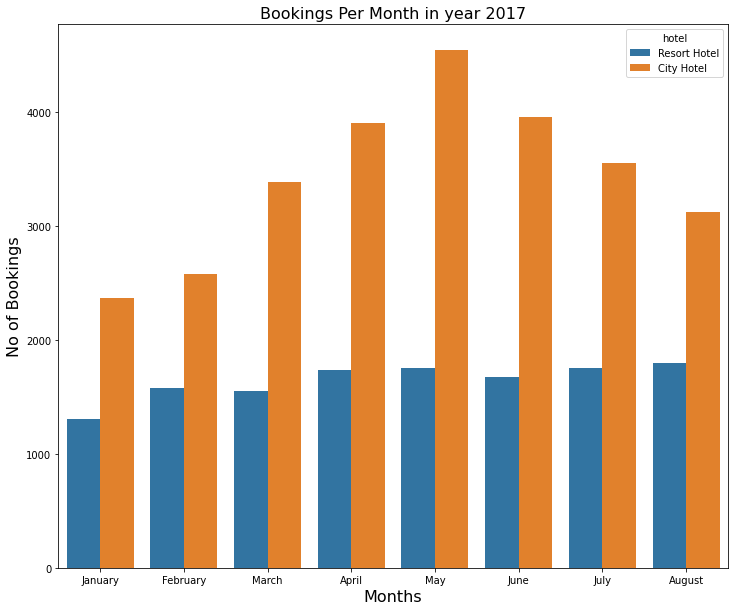

In [ ]:
plt.figure(figsize =(12,10))
sns.countplot(data = data_2017 , x = 'arrival_date_month' , hue = 'hotel')
plt.title('Bookings Per Month in year 2017' , fontsize = 16)
plt.xlabel('Months' , fontsize = 16)
plt.ylabel('No of Bookings' , fontsize = 16)

# Most prefered type of Rooms

In [ ]:
most_prefered_rooms = df['reserved_room_type'].value_counts()
most_prefered_rooms = most_prefered_rooms.reset_index()
most_prefered_rooms.columns = ['type of rooms' , 'no of bookings']
x = most_prefered_rooms['type of rooms']
y = most_prefered_rooms['no of bookings']

Text(0, 0.5, 'No of Bookings')

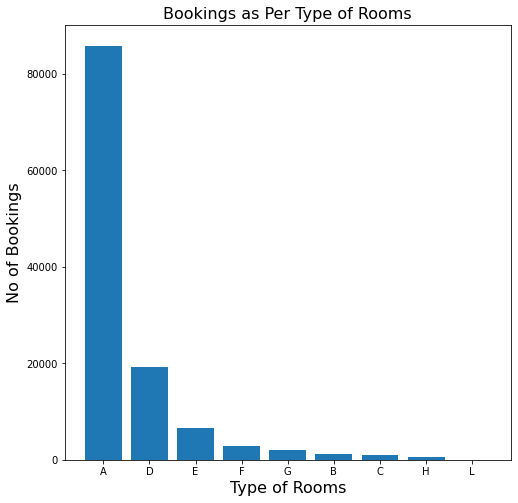

In [ ]:
plt.figure(figsize =(8, 8))
plt.bar(x , y)
plt.title('Bookings as Per Type of Rooms' , fontsize = 16)
plt.xlabel('Type of Rooms' , fontsize = 16)
plt.ylabel('No of Bookings' , fontsize = 16)




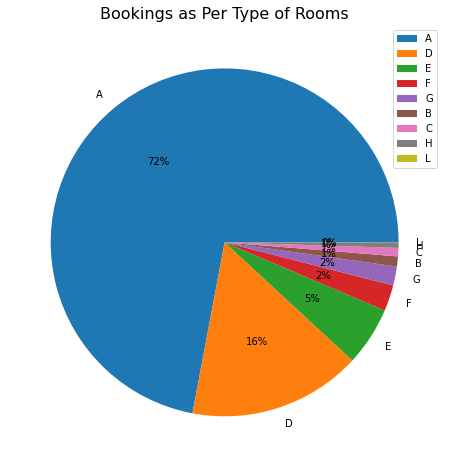

In [ ]:
plt.figure(figsize =(8, 8))
plt.pie(y , labels = x , autopct='%.0f%%' )
plt.title('Bookings as Per Type of Rooms' , fontsize = 16)
plt.legend(x)


# Maximum Booking per month in all years

In [ ]:
#Getting only those rows which has not cancelled the booking
df1 = df.loc[df['is_canceled']==0]

In [ ]:
max_booking = df1.groupby('arrival_date_month')['hotel'].value_counts()
max_booking


arrival_date_month  hotel       
April               City Hotel      4010
                    Resort Hotel    2550
August              City Hotel      5367
                    Resort Hotel    3257
December            City Hotel      2377
                    Resort Hotel    2014
February            City Hotel      3051
                    Resort Hotel    2308
January             City Hotel      2249
                    Resort Hotel    1866
July                City Hotel      4770
                    Resort Hotel    3137
June                City Hotel      4358
                    Resort Hotel    2037
March               City Hotel      4049
                    Resort Hotel    2571
May                 City Hotel      4568
                    Resort Hotel    2535
November            City Hotel      2676
                    Resort Hotel    1975
October             City Hotel      4326
                    Resort Hotel    2575
September           City Hotel      4283
                    Reso

Text(0, 0.5, 'No of bookings made')

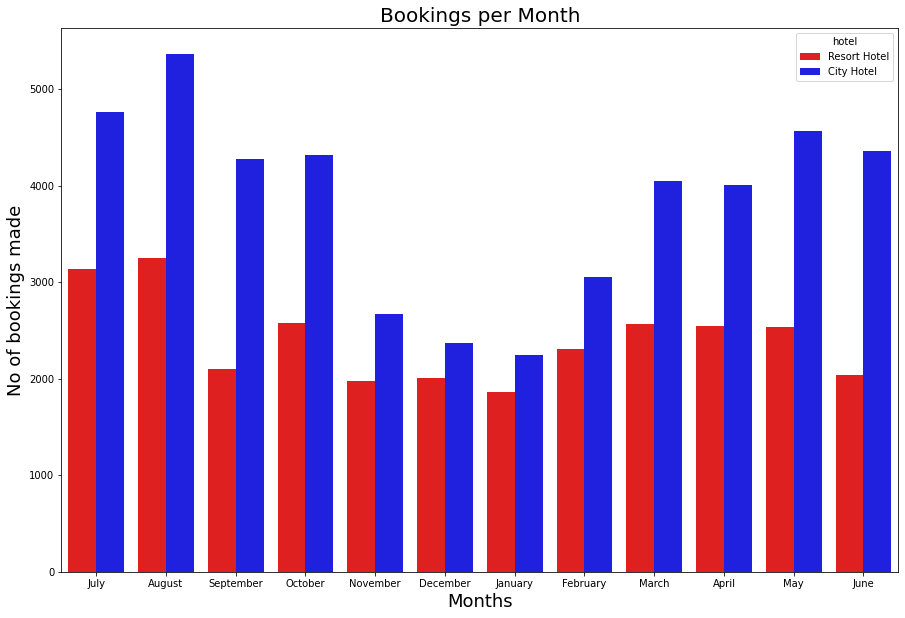

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=df1 , x = 'arrival_date_month' , hue = 'hotel' , palette=['red' , 'blue'])
plt.title('Bookings per Month' , fontsize = 20)
plt.xlabel('Months' , fontsize = 18)
plt.ylabel('No of bookings made' , fontsize = 18)

# Completed Bookings per country

In [ ]:
bookings_per_country = df1['country'].value_counts()
bookings_per_country = bookings_per_country.reset_index()
bookings_per_country.columns=['country' , 'sucessive bookings']
bookings_per_country

,country,sucessive bookings
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


Text(0, 0.5, 'No of Bookings')

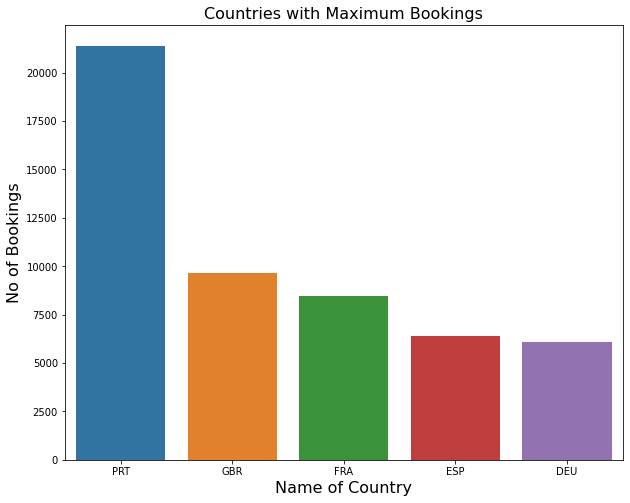

In [ ]:
#plotting top 5 countries as per bookings
top_country_bookings = bookings_per_country.loc[0:4]
plt.figure(figsize=(10,8))
sns.barplot(data= top_country_bookings , x = 'country' , y = 'sucessive bookings')
plt.title('Countries with Maximum Bookings' , fontsize = 16)
plt.xlabel('Name of Country' , fontsize = 16)
plt.ylabel('No of Bookings' , fontsize = 16)



In [ ]:
import folium
import plotly.express as pltx
Base_map = folium.Map()
Guest_map = pltx.choropleth(bookings_per_country, locations = bookings_per_country['country'],color = bookings_per_country['country'], hover_name = bookings_per_country['country'])
Guest_map.show()

# Average Daily Rate (ADR) across all Room Type

In [ ]:
adr_room_type = df1.groupby('reserved_room_type')['adr'].mean()
adr_room_type

reserved_room_type
A     89.332724
B     87.583529
C    153.266228
D    116.541178
E    119.230854
F    159.479345
G    169.492167
H    180.870112
L    151.000000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

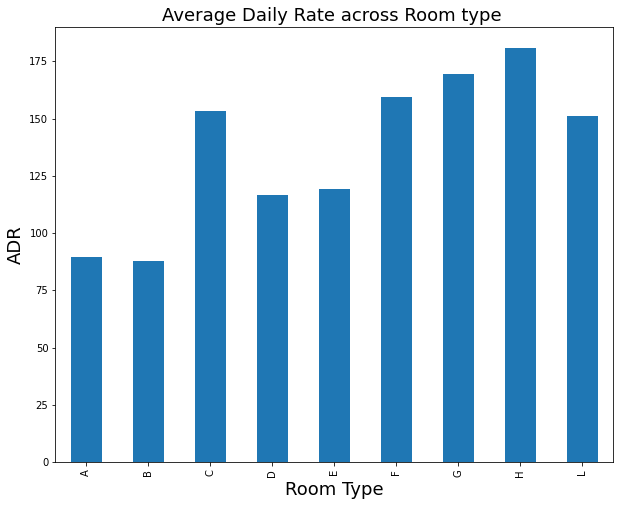

In [ ]:
plt.figure(figsize=(10,8))
adr_room_type.plot(kind = 'bar')
plt.title('Average Daily Rate across Room type ' , fontsize = 18)
plt.xlabel('Room Type' , fontsize = 18)
plt.ylabel('ADR' , fontsize = 18)

In [ ]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status', 'revenue'],
      dtype='object')

# Average Revenue per Type of Hotel Per Day

In [ ]:
# getting the avg revenue
avg_revenue = df1.groupby('hotel')['revenue'].mean()
avg_revenue = avg_revenue.reset_index()
avg_revenue.columns = ['hotel' , 'avg revenue']
avg_revenue

,hotel,avg revenue
0,City Hotel,312.154804
1,Resort Hotel,401.063720


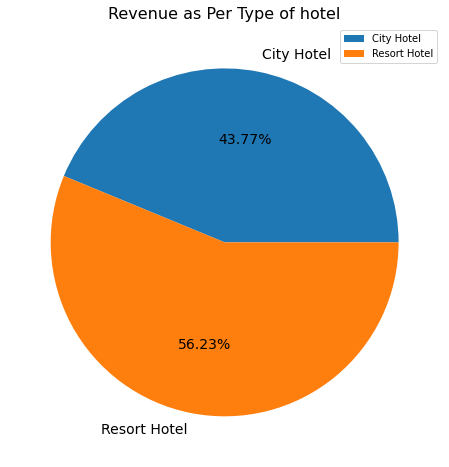

In [ ]:
x1 = avg_revenue['hotel']
y1 = avg_revenue['avg revenue']
plt.figure(figsize =(8, 8))
plt.pie(y1 , labels = x1 , autopct='%.2f%%' , textprops={'fontsize': 14})
plt.title('Revenue as Per Type of hotel' , fontsize = 16)
plt.legend(x1)

# Average daily revenue  for all the months as per type of Hotel for all Years

In [ ]:
# Monthly revenue for City Hotel
city_hotel = df1.loc[df1['hotel']=='City Hotel']
revenue_month = city_hotel.groupby('arrival_date_month')['adr'].sum()
revenue_month = revenue_month.reset_index()
revenue_month.columns = ['Month' , 'revenue']
revenue_month

,Month,revenue
0,April,448968.69
1,August,636926.57
2,December,210131.21
3,February,263972.71
4,January,185162.38
5,July,552451.95
6,June,513696.46
7,March,367076.40
8,May,551219.77
9,November,232669.08


Text(0, 0.5, 'Revenue')

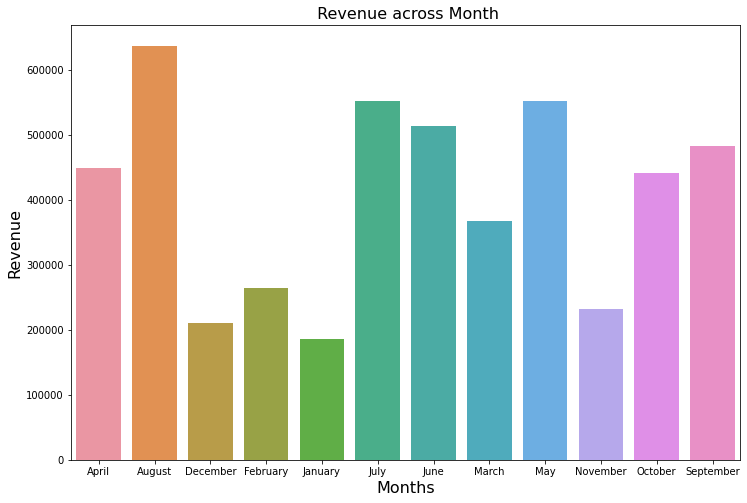

In [ ]:
plt.figure(figsize =(12,8))
sns.barplot(data = revenue_month , x = 'Month' , y = 'revenue')
plt.title(' Revenue across Month' , fontsize = 16)
plt.xlabel('Months' , fontsize = 16)
plt.ylabel('Revenue' , fontsize = 16)

In [ ]:
# avg daily revenue for resort hotel
resort_hotel = df1.loc[df1['hotel']=='Resort Hotel']
resort_revenue= resort_hotel.groupby('arrival_date_month')['adr'].sum()
resort_revenue=resort_revenue.reset_index()
resort_revenue.columns = ['Month' , 'revenue']
resort_revenue

,Month,revenue
0,April,193462.93
1,August,590187.59
2,December,137777.95
3,February,124972.38
4,January,90988.26
5,July,470934.37
6,June,219944.77
7,March,146693.13
8,May,194326.91
9,November,96194.92


Text(0, 0.5, 'Revenue')

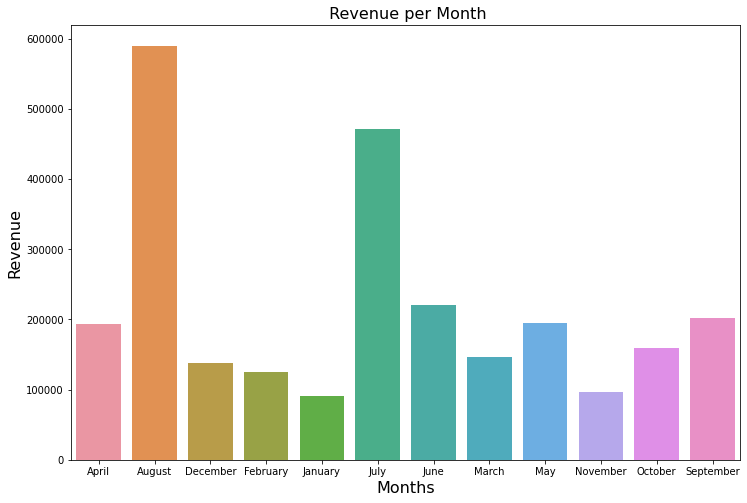

In [ ]:
plt.figure(figsize =(12,8))

sns.barplot(data = resort_revenue , x = 'Month' , y = 'revenue')
plt.title(' Revenue per Month' , fontsize = 16)
plt.xlabel('Months' , fontsize = 16)
plt.ylabel('Revenue' , fontsize = 16)

# Bookings Canceled per year

In [ ]:
# Getting the data only for canceled bookings
df2 = df[df['is_canceled']==1]

In [ ]:
canceled_bookings = df2.groupby('arrival_date_year')['is_canceled'].sum()
canceled_bookings = canceled_bookings.reset_index()
canceled_bookings.columns = ['year' , 'cancelled bookings']
canceled_bookings

,year,cancelled bookings
0,2015,8141
1,2016,20324
2,2017,15734


Text(0, 0.5, 'No of Cancelled Bookings')

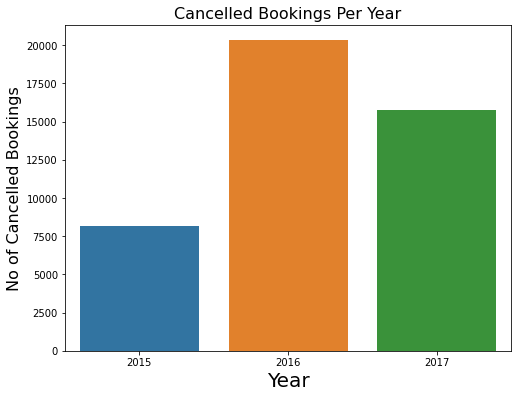

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = df2 , x = 'arrival_date_year')
plt.title('Cancelled Bookings Per Year' , fontsize = 16)
plt.xlabel('Year' , fontsize = 20)
plt.ylabel('No of Cancelled Bookings' , fontsize = 16)

# Canceled bookings per month across all years

In [ ]:
cancelled_per_month = df2.groupby('arrival_date_month')['is_canceled'].sum()
cancelled_per_month.reset_index()

,arrival_date_month,is_canceled
0,April,4518
1,August,5237
2,December,2368
3,February,2693
4,January,1806
5,July,4737
6,June,4534
7,March,3148
8,May,4677
9,November,2120


Text(0, 0.5, 'No of Cancelled Bookings')

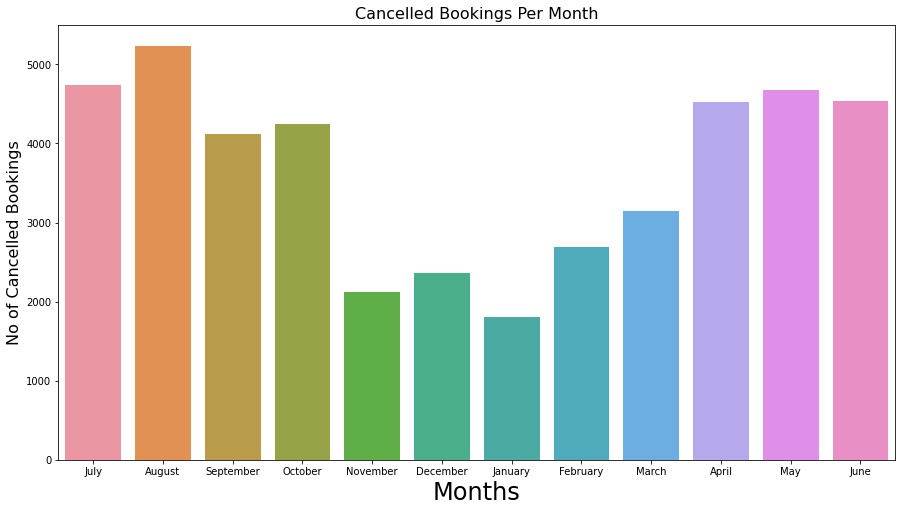

In [ ]:
#plotting the data of cancelled bookings
plt.figure(figsize = (15,8))
sns.countplot(data = df2 , x = 'arrival_date_month')
plt.title('Cancelled Bookings Per Month' , fontsize = 16)
plt.xlabel('Months' , fontsize = 24)
plt.ylabel('No of Cancelled Bookings' , fontsize = 16)

In [ ]:
#line plot for the canceled across all type of hotel in year 2015
canceled_year_2015 = df2.loc[df2['arrival_date_year']==2015]
canceled_year_2015 = canceled_year_2015.groupby(['arrival_date_month' , 'hotel'])['is_canceled'].sum()
canceled_year_2015 = canceled_year_2015.reset_index()
canceled_year_2015.columns = ['months' ,'type of hotel' , 'canceled bookings']
months_in_order = [ 'July' , 'August' , 'September' , 'October' , 'November' ,'December']
canceled_year_2015['months'] = pd.Categorical(canceled_year_2015.months,categories=months_in_order , ordered=True)
canceled_year_2015 = canceled_year_2015.sort_values('months')
canceled_year_2015

,months,type of hotel,canceled bookings
4,July,City Hotel,939
5,July,Resort Hotel,320
0,August,City Hotel,1232
1,August,Resort Hotel,366
10,September,City Hotel,1542
11,September,Resort Hotel,551
8,October,City Hotel,1321
9,October,Resort Hotel,411
6,November,City Hotel,301
7,November,Resort Hotel,185


Text(0, 0.5, 'No of Canceled Bookings')

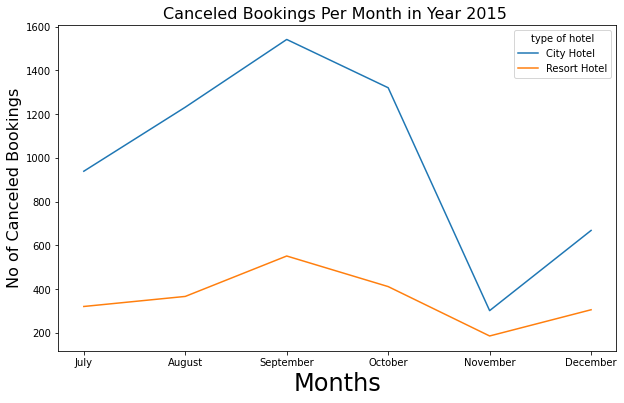

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data = canceled_year_2015 , x = 'months' , y = 'canceled bookings' , hue = 'type of hotel')
plt.title('Canceled Bookings Per Month in Year 2015 ' , fontsize = 16)
plt.xlabel('Months' , fontsize = 24)
plt.ylabel('No of Canceled Bookings' , fontsize = 16)

In [ ]:
# canceled booking for year 2016
canceled_year_2016 = df2.loc[df2['arrival_date_year']==2016]
canceled_year_2016 = canceled_year_2016.groupby(['arrival_date_month' , 'hotel'])['is_canceled'].sum()
canceled_year_2016 = canceled_year_2016.reset_index()
canceled_year_2016.columns = ['months' ,'hotel type', 'canceled bookings']
months_in_order = [ 'January' , 'February' , 'March' , 'April' , 'May' , 'June' ,'July' , 'August' , 'September' , 'October' , 'November' ,'December']
canceled_year_2016['months'] = pd.Categorical(canceled_year_2016.months,categories=months_in_order , ordered=True)
canceled_year_2016 = canceled_year_2016.sort_values('months')
canceled_year_2016

,months,hotel type,canceled bookings
8,January,City Hotel,438
9,January,Resort Hotel,119
6,February,City Hotel,929
7,February,Resort Hotel,406
15,March,Resort Hotel,369
14,March,City Hotel,1108
0,April,City Hotel,1538
1,April,Resort Hotel,522
17,May,Resort Hotel,479
16,May,City Hotel,1436


Text(0, 0.5, 'No of Canceled Bookings')

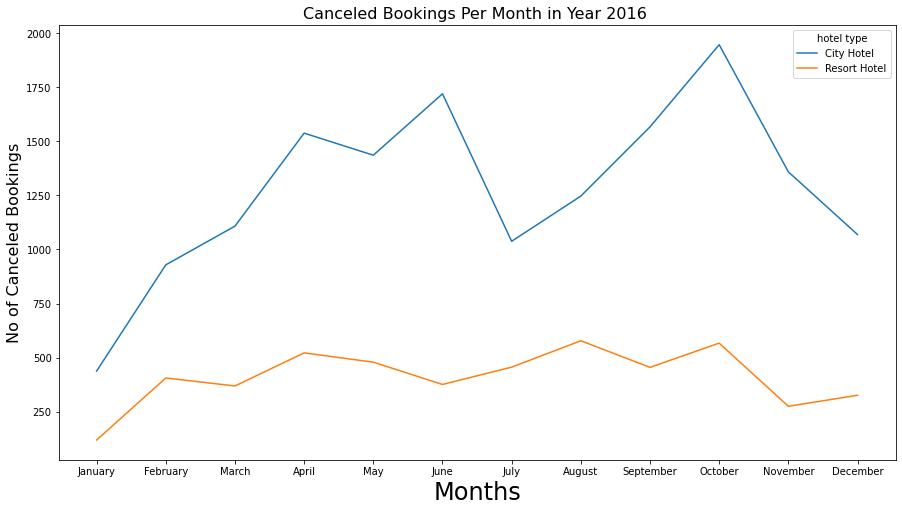

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = canceled_year_2016 , x = 'months' , y = 'canceled bookings' , hue = 'hotel type' )
plt.title('Canceled Bookings Per Month in Year 2016 ' , fontsize = 16)
plt.xlabel('Months' , fontsize = 24)
plt.ylabel('No of Canceled Bookings' , fontsize = 16)

In [ ]:
# canceled booking for year 2017 across all type of Hotels
canceled_year_2017 = df2.loc[df2['arrival_date_year']==2017]
canceled_year_2017 = canceled_year_2017.groupby(['arrival_date_month' , 'hotel'])['is_canceled'].sum()
canceled_year_2017 = canceled_year_2017.reset_index()
canceled_year_2017.columns = ['months' ,'type of hotel' , 'canceled bookings']
months_in_order = [ 'January' , 'February' , 'March' , 'April' , 'May' , 'June' ,'July' , 'August' , 'September' , 'October' , 'November' ,'December']
canceled_year_2017['months'] = pd.Categorical(canceled_year_2017.months,categories=months_in_order , ordered=True)
canceled_year_2017 = canceled_year_2017.sort_values('months')
canceled_year_2017

,months,type of hotel,canceled bookings
6,January,City Hotel,1043
7,January,Resort Hotel,206
4,February,City Hotel,970
5,February,Resort Hotel,388
12,March,City Hotel,1277
13,March,Resort Hotel,394
0,April,City Hotel,1921
1,April,Resort Hotel,537
14,May,City Hotel,2217
15,May,Resort Hotel,545


Text(0, 0.5, 'No of Canceled Bookings')

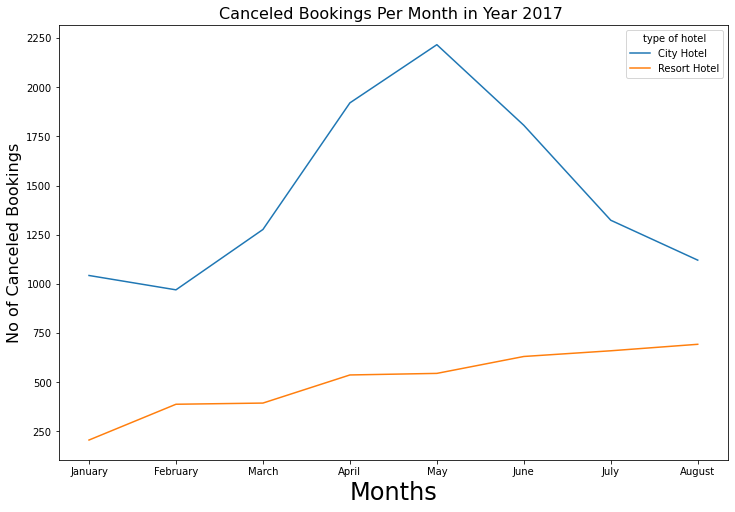

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data = canceled_year_2017 , x = 'months' , y = 'canceled bookings', hue = 'type of hotel')
plt.title('Canceled Bookings Per Month in Year 2017 ' , fontsize = 16)
plt.xlabel('Months' , fontsize = 24)
plt.ylabel('No of Canceled Bookings' , fontsize = 16)

# Cancellation across type of deposite made

In [ ]:
canceled_bookings = df2.groupby('deposit_type')['is_canceled'].sum()
canceled_bookings = canceled_bookings.reset_index()
canceled_bookings

,deposit_type,is_canceled
0,No Deposit,29669
1,Non Refund,14494
2,Refundable,36


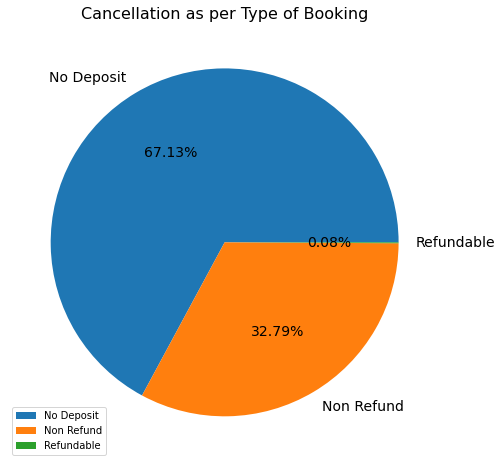

In [ ]:

plt.figure(figsize =(8, 8))
plt.pie( canceled_bookings['is_canceled'] ,  labels = canceled_bookings['deposit_type'] , autopct='%.2f%%' , textprops={'fontsize': 14} )
plt.title('Cancellation as per Type of Booking' , fontsize = 16)
plt.legend(canceled_bookings['deposit_type'])

# From above we got to know that Year 2016 has most canceled bookings in Year 2016 october Month has most canceled Bookings

# How many Customer ordered the meal and which type of Meal is Ordered

In [ ]:
# which type of hotel is ordered the most type of meal for city hotel
most_meal = pd.DataFrame(df1.groupby('hotel')['meal'].value_counts())
most_meal.rename(columns = { 'meal' : 'No of Meal'} , inplace = True)
most_meal


No of Meal
hotel        meal                 
City Hotel   BB              35570
             SC               6529
             HB               3976
             FB                  9
Resort Hotel BB              22160
             HB               5499
             Undefined         883
             FB                311
             SC                 74

Text(0, 0.5, 'No of Meals Ordered')

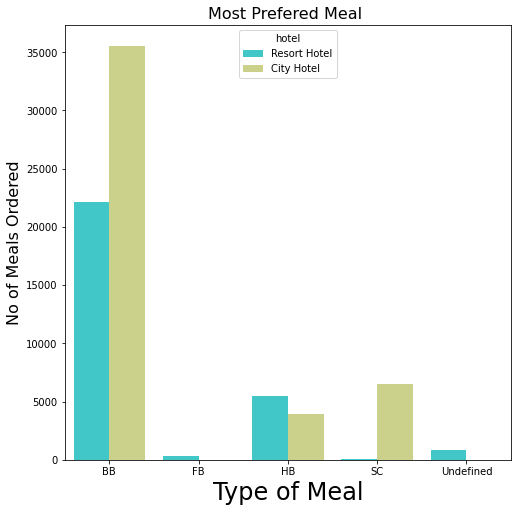

In [ ]:
# plotting the most prefered meal across each type of hotel
plt.figure(figsize=(8,8))
sns.countplot(data=df1 , x = 'meal' , hue = 'hotel' , palette = 'rainbow')
plt.title('Most Prefered Meal ' , fontsize = 16)
plt.xlabel('Type of Meal' , fontsize = 24)
plt.ylabel('No of Meals Ordered' , fontsize = 16)

# How many Customer Opted for Parkings

In [ ]:
# how many customer has opted for parking
parking_opted = pd.DataFrame(df.groupby('hotel')['required_car_parking_spaces'].value_counts())
parking_opted.rename(columns = {'required_car_parking_spaces':'total no of parking'} , inplace=True)
parking_opted

total no of parking
hotel        required_car_parking_spaces                     
City Hotel   0                                          77243
             1                                           1915
             2                                              3
             3                                              2
Resort Hotel 0                                          34558
             1                                           5461
             2                                             25
             8                                              2
             3                                              1

Text(0, 0.5, 'No of Customer Opted')

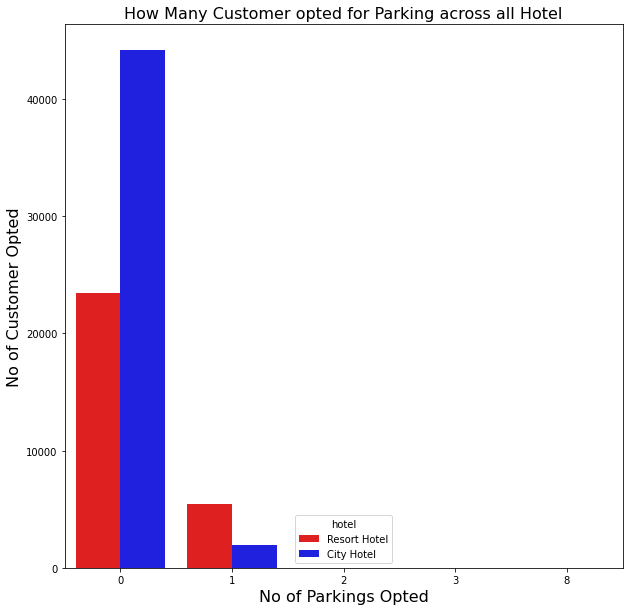

In [ ]:
#plotting the no of parking opted by customer
plt.figure(figsize=(10,10))
sns.countplot(data = df1 , x = 'required_car_parking_spaces' , hue = 'hotel' , palette = ['red' , 'blue'] )
plt.title('How Many Customer opted for Parking across all Hotel' , fontsize = 16)
plt.xlabel('No of Parkings Opted' , fontsize = 16)
plt.ylabel('No of Customer Opted' , fontsize = 16)


# No of repeated customer across all type of Hotel

In [ ]:
repeated_customer = df1.groupby('hotel')['is_repeated_guest'].value_counts()
city_hotel_percentage = (1538/46084)*100
resort_hotel_percentage = (1667/28927)*100
print(city_hotel_percentage)
print(resort_hotel_percentage)

3.3373839076469056
5.762782175821896


In [ ]:
df1['hotel'].value_counts()

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64

In [ ]:
#plotting the number of repeated customer
repeated_customer = df1.loc[df1['is_repeated_guest']==1]
repeated_customer = repeated_customer['hotel'].value_counts().reset_index()
repeated_customer.columns = ['type of hotel' , 'no of repeated customer']
repeated_customer

,type of hotel,no of repeated customer
0,Resort Hotel,1667
1,City Hotel,1538


Text(0, 0.5, 'No of Repeated Customers')

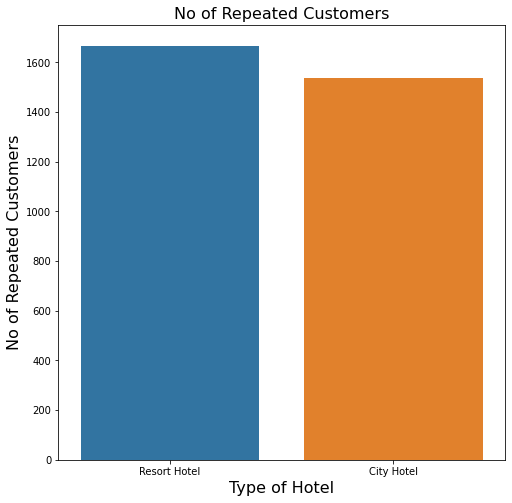

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=repeated_customer , x = 'type of hotel' , y = 'no of repeated customer')
plt.title('No of Repeated Customers' , fontsize = 16)
plt.xlabel('Type of Hotel' , fontsize = 16)
plt.ylabel('No of Repeated Customers' , fontsize = 16)

# **Observations**

1. Most of the people booked City Hotel
2.  Most numner of booking were in year 2016 as it has data of all months 2015 and 2017 has data of only few months
3. As the bookings were much more higher in City Hotel we generated most revenue from City Hotel
4. As per type of customer Transient customers have booked most of the times
5. In year 2015 most bookings were in month of September/october. In Year 2016 most bookings were in months of june/october. In year 2017 most bookings were in months of may/june.
6. From the most Bookings per we can see that in the months of june , july and August has highest bookings.
7. july/August months has the highest rate of Bookings
8. Portugal , Great Britan and France has booked the hotels most number of times.
9. Avg Revenue per Day for Resort Hotel is 401.06 which is about 56.23% and for City Hotel 312.15 which is about 43.77%.
10. Avg revenue per day was highest in months of May/june for City Hotel and july/Aug for the Resort Hotel.
11. Most Cancelled bookings were in year of 2016
12) July and August months has the highest cancellations.
13. Most Cancellations were done by City Hotel customers.
14. BB meal is the preferred type of meal for both the type of hotel
15. Very Less number of Customers opted for parking.
16. Resort Hotel has the Highest number of repeated customers.


# **Conclusion**

1. Most bookings were made for City Hotel but the revenue Generated were most for Resort Hotel so focus more on Resort Hotel.
2. Most of the bookings were from PRT , GBR , France so advertise more in other countries with some special offers target these top countries more.
3. Most booked type of rooms were A/D/E and very very less bookings for other type of rooms so increase A/D/E type of rooms.
4. Major bookings were canceled in months of july/August try to send exciting offers for the booked customers in these months.
5. Most Canceled bookings were from the customers which hasn't paid the deposits so try to take deposits from more customers.
6. There are very less no of repeated customers try to understand customer needs and try to fulfill maximum of it.